<a href="https://colab.research.google.com/github/janafarag/deep_learning/blob/main/MNIST%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

**Author:** Jana Farag <br>
**Date created:** 2024/03/20<br>
**Last modified:** 2024/03/29<br>
**Description:** Training a custom and vanilla model with the MNIST dataset.

## Install Keras 3

In [1]:
!pip install keras==3.0.0 --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.1/997.1 kB 9.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.0 which is incompatible.


## Setup

Use a tensorflow backend with keras


In [2]:
import numpy as np
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

# Note that Keras should only be imported after the backend
# has been configured. The backend cannot be changed once the
# package is imported.
import keras

import tensorflow as tf
tf.compat.v1.enable_eager_execution()

# for kfold cross validation
from sklearn.model_selection import StratifiedKFold

## Prepare MNIST dataset

Download and reshape dataset to fit the example.

In [3]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#reshape dataset to fit example
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

num_classes = 10 # output layer classes

# one hot encoding needed for mean square error metric
y_train_one_hot = np.eye(num_classes)[y_train]
y_test_one_hot = np.eye(num_classes)[y_test]

print("train one hot shape:", y_train_one_hot.shape)
print("test one hot shape:", y_test_one_hot.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train shape: (60000, 784)
y_train shape: (60000,)
60000 train samples
10000 test samples
train one hot shape: (60000, 10)
test one hot shape: (10000, 10)


## Configure a timer as a callback before and after epoch

In [4]:
from timeit import default_timer as timer

class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

## Training the vanilla model

5-split validation

reproducable seed

shuffled

## Configure vanilla model and custom model with the Sequential API





1. **vanilla model** is specified with
 loss function: mean squared error,
 optimizer: Adam,
 monitoring the accuracy


In [5]:
## cross validation
fold_count = 1
seed = 7
cross_val = StratifiedKFold(n_splits = 5, random_state = seed, shuffle = True)

# For loss & acc plotting
histories_vanilla = []

# For testing/evaluation acc scores
eval_scores = []

# For testing/evaluation training times
training_times_vanilla = []

# model configurations
batch_size = 100
epochs = 20


# Model parameters
num_classes = 10 # output layer classes
input_shape = (784,)

## callbacks
mc = keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras")
cb_vanilla = TimingCallback()



In [6]:
# Cross validate model performance with k fold cross validation
for train_index, val_index in cross_val.split(x_train, y_train):
    print("="*80)
    print("Fold-{}".format(fold_count))
    print("-"*80)
    print("Training & Validation")
    fold_count +=1

    # init vanilla model
    vanilla_model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape, name= "input_layer"),
        keras.layers.Dense(16, activation="sigmoid", name= "layer_1"),
        keras.layers.Dense(16, activation="sigmoid", name= "layer_2"),
        keras.layers.Dense(10, activation="sigmoid", name= "output_layer"),

    ]
  )

    # compile model
    vanilla_model.compile(
      loss=keras.losses.MeanSquaredError(), # according to vid
      optimizer=keras.optimizers.Adam(learning_rate=1e-3), #smaller steps towards the end
      metrics=[
          'accuracy'
      ],
    )

    # split samples according to generate indices
    X_Train, X_Val = x_train[train_index], x_train[val_index]
    Y_Train, Y_Val = y_train[train_index], y_train[val_index]

    # make y categorical
    Y_Train_Cat = keras.utils.to_categorical(Y_Train, num_classes)
    Y_Val_Cat = keras.utils.to_categorical(Y_Val, num_classes)

    # train model with split data
    history = vanilla_model.fit(X_Train, Y_Train_Cat,
                        epochs=epochs,
                        validation_data=(X_Val, Y_Val_Cat),
                        callbacks=[mc, cb_vanilla])

    print("-"*80)
    print("Testing/evaluation")
    score = vanilla_model.evaluate(x_test, y_test_one_hot, verbose=0)

    histories_vanilla.append(history)
    eval_scores.append(score[1]) # val_accuracy
    training_times_vanilla.append(cb_vanilla.logs)
    print("_"*80)



Fold-1
--------------------------------------------------------------------------------
Training & Validation
Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1830 - loss: 0.1217 - val_accuracy: 0.5820 - val_loss: 0.0657
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6805 - loss: 0.0558 - val_accuracy: 0.8349 - val_loss: 0.0308
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8550 - loss: 0.0277 - val_accuracy: 0.8978 - val_loss: 0.0197
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9042 - loss: 0.0180 - val_accuracy: 0.9099 - val_loss: 0.0155
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9168 - loss: 0.0148 - val_accuracy: 0.9170 - val_loss: 0.0135
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9226 - loss: 0.0132 - val_accuracy: 0.9239 - val_loss: 0.0124
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9299 - loss: 0.0119 - val_accuracy: 0.9266

## Average Validation Accuracy over all folds

In [7]:
# Calculate and print the average accuracy across all folds
avg_accuracy_vanilla = np.mean(eval_scores)
print("Average Accuracy:", avg_accuracy_vanilla)

Average Accuracy: 0.9426199913024902


## Average Training Time

In [28]:
# Calculate and print the average accuracy across all folds
avg_time_vanilla = np.mean(training_times_vanilla)
print("Average Training Time per epoch for the vanilla model took {} seconds.".format(avg_time_vanilla))

Average Training Time per epoch for the vanilla model took 5.116411374230003 seconds.


## Training the Custom Model

In [21]:
## cross validation
fold_count = 1
seed = 7
cross_val = StratifiedKFold(n_splits = 5, random_state = seed, shuffle = True)

# For loss & acc plotting
histories_custom = []

# For testing/evaluation acc scores
eval_scores_custom = []

# For testing/evaluation training times
training_times_custom = []

# model configurations
batch_size =35
epochs = 20


# Model parameters
num_classes = 10 # output layer classes
input_shape = (784,)

## callbacks
mc = keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras")
es =  keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
cb_custom = TimingCallback()



2. **custom model** is specified with
loss function: Spase Categorical Cross Entropy (multiple label classes),
optimizer: Adam, monitoring the accuracy

In [22]:
# Cross validate model performance with k fold cross validation
for train_index, val_index in cross_val.split(x_train, y_train):
    print("="*80)
    print("Fold-{}".format(fold_count))
    print("-"*80)
    print("Training & Validation")
    fold_count +=1

    # init custom_model
    custom_model = keras.Sequential(
      [
          keras.layers.Input(shape=input_shape, name= "input_layer"),
          keras.layers.Dense(128, activation="relu", name= "layer_1"),
          keras.layers.Dense(128, activation="relu", name= "layer_2"),
          keras.layers.Dropout(0.5),
          keras.layers.Dense(10, activation="softmax", name= "output_layer"),

      ]
    )


    # compile model
    custom_model.compile(
      loss=keras.losses.SparseCategoricalCrossentropy(), # multi class
          optimizer=keras.optimizers.Adam(learning_rate=1e-3),

      metrics=[
          keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
      ],
    )

    # split samples according to generate indices
    X_Train, X_Val = x_train[train_index], x_train[val_index]
    Y_Train, Y_Val = y_train[train_index], y_train[val_index]


    # train model with split data
    history = custom_model.fit(X_Train, Y_Train,
                        epochs=epochs,
                        validation_data=(X_Val, Y_Val),
                        callbacks=[mc, es, cb_custom])

    print("-"*80)
    print("Testing/evaluation")
    score = custom_model.evaluate(x_test, y_test, verbose=0)

    histories_custom.append(history)
    eval_scores_custom.append(score[1])
    training_times_custom.append(cb_custom.logs)
    print("_"*80)



Fold-1
--------------------------------------------------------------------------------
Training & Validation
Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8118 - loss: 0.6034 - val_accuracy: 0.9574 - val_loss: 0.1403
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9521 - loss: 0.1655 - val_accuracy: 0.9683 - val_loss: 0.1041
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9674 - loss: 0.1116 - val_accuracy: 0.9698 - val_loss: 0.0948
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9743 - loss: 0.0857 - val_accuracy: 0.9723 - val_loss: 0.0895
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9799 - loss: 0.0683 - val_accuracy: 0.9750 - val_loss: 0.0818
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9833 - loss: 0.0556 - val_accuracy: 0.9744 - val_loss: 0.0849
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9855 - loss: 0.0475 - val_accuracy: 0

## Average Validation Accuracy over all folds

In [29]:
# Calculate and print the average accuracy across all folds
avg_accuracy_custom = np.mean(eval_scores_custom)
print("Average Accuracy:", avg_accuracy_custom)

Average Accuracy: 0.9707000136375428


## Average Training Time

In [30]:
# Calculate and print the average accuracy across all folds
avg_time_custom = np.mean(training_times_custom)
print("Average Training Time per epoch for the Custom model took {} seconds.".format(avg_time_custom))

Average Training Time per epoch for the Custom model took 9.621511095799997 seconds.


## Comparison of training times and average accuracy

*   vanilla model
*   custom model



## Training time vanilla model

In [31]:
training_time_vanilla = sum(cb_vanilla.logs)
print("The trainng of the vanilaa model took {} seconds".format(training_time_vanilla))

The trainng of the vanilaa model took 511.64113742300026 seconds


## Training time custom model

In [32]:
training_time_custom = sum(cb_custom.logs)
print("The trainng of the vanilaa model took {} seconds".format(training_time_custom))

The trainng of the vanilaa model took 192.43022191599994 seconds


## Training Time and Accuracy compared

In [37]:
# training time
print("The training of the VANILLA model took {} seconds. \n The training of the CUSTOM model took {} seconds. Which is {} times the faster than the vanilla model."
.format(training_time_vanilla, training_time_custom, (training_time_vanilla / training_time_custom)))

# accuracy
print("\nThe average test data accuracy of the VANILLA model was {} %. \nThe average test data accuracy of the CUSTOM model was {} %. Which is {}% more than the than the vanilla model."
.format(avg_accuracy_vanilla *100, avg_accuracy_custom *100, (avg_accuracy_custom*100 - avg_accuracy_vanilla*100)))

The training of the VANILLA model took 511.64113742300026 seconds. 
 The training of the CUSTOM model took 192.43022191599994 seconds. Which is 2.658839824268056 times the faster than the vanilla model.

The average test data accuracy of the VANILLA model was 94.26199913024902 %. 
The average test data accuracy of the CUSTOM model was 97.07000136375427 %. Which is 2.808002233505249% more than the than the vanilla model.


## Visualization of model accuracy and loss for vanilla model vs custom model

In [38]:
import matplotlib.pyplot as plt

def display_kfold_result(history, k=1, model_name="Model"):
    # Train & Val Loss
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    # Train & Val Accuracy
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.title("Loss of {}".format(model_name))
    plt.plot(loss, label="Training")
    plt.plot(val_loss, label="Test")
    plt.legend(loc="upper right")

    plt.subplot(1, 2, 2)
    plt.title("Accuracy of {}".format(model_name))
    plt.plot(accuracy, label="Training")
    plt.plot(val_accuracy, label="Test")
    plt.legend(loc="lower right")

    plt.suptitle("Fold-{}".format(k))
    plt.show()

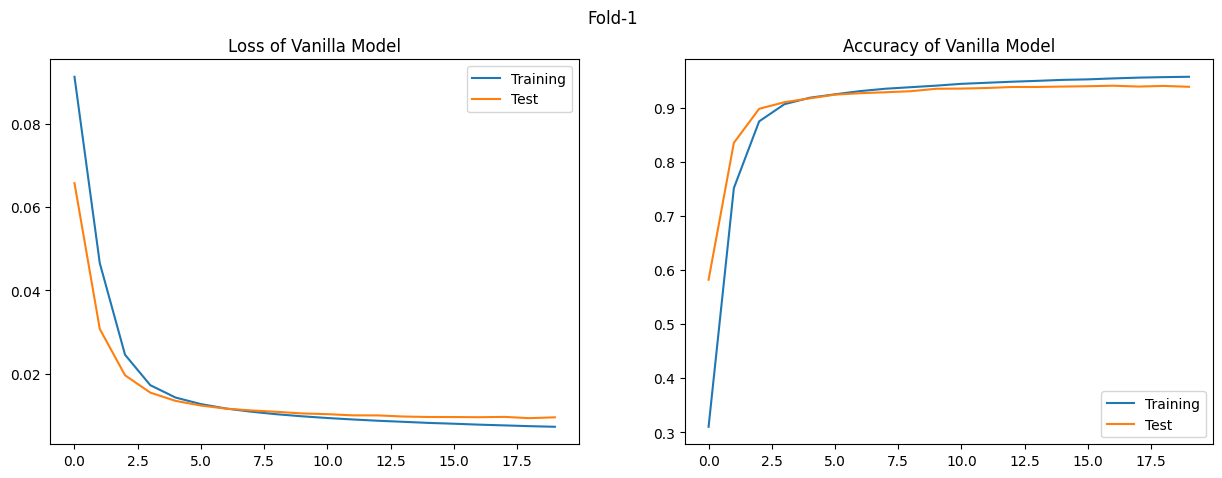

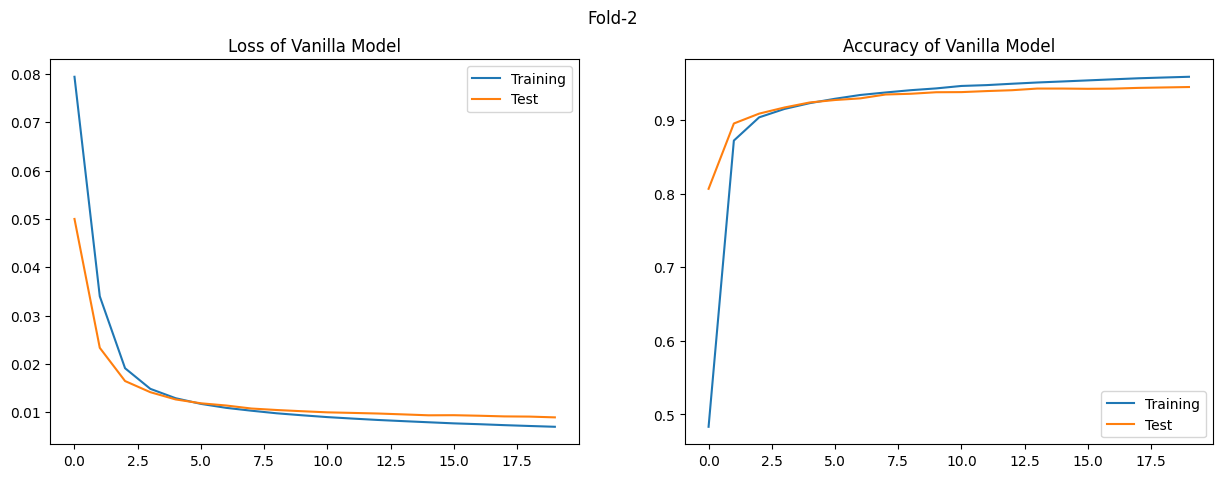

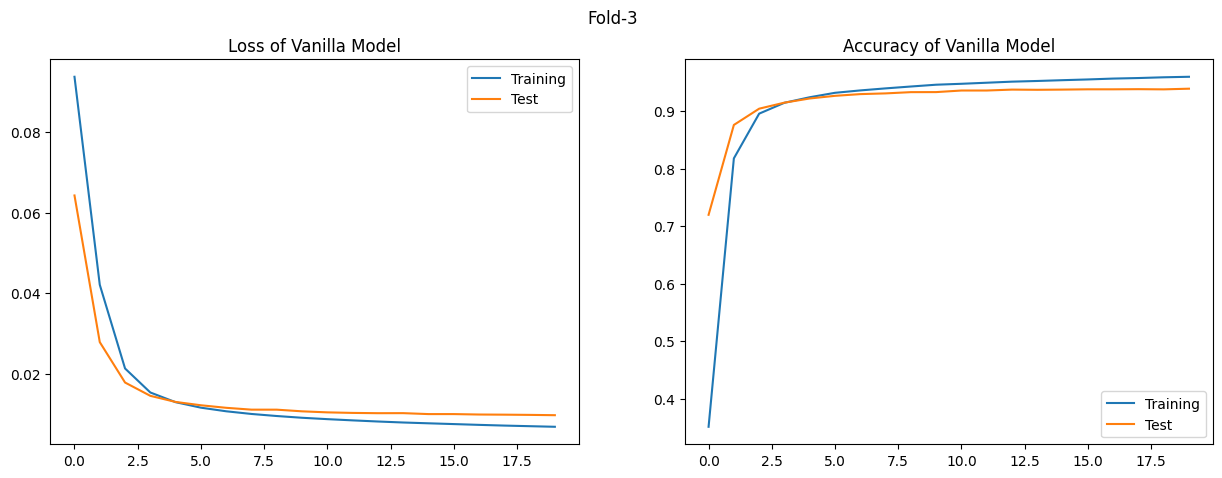

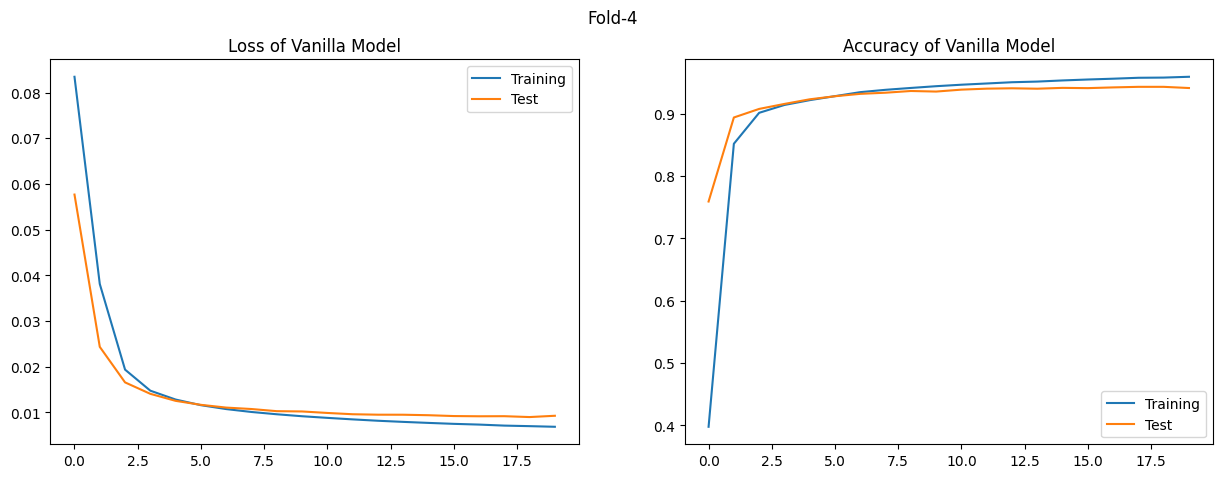

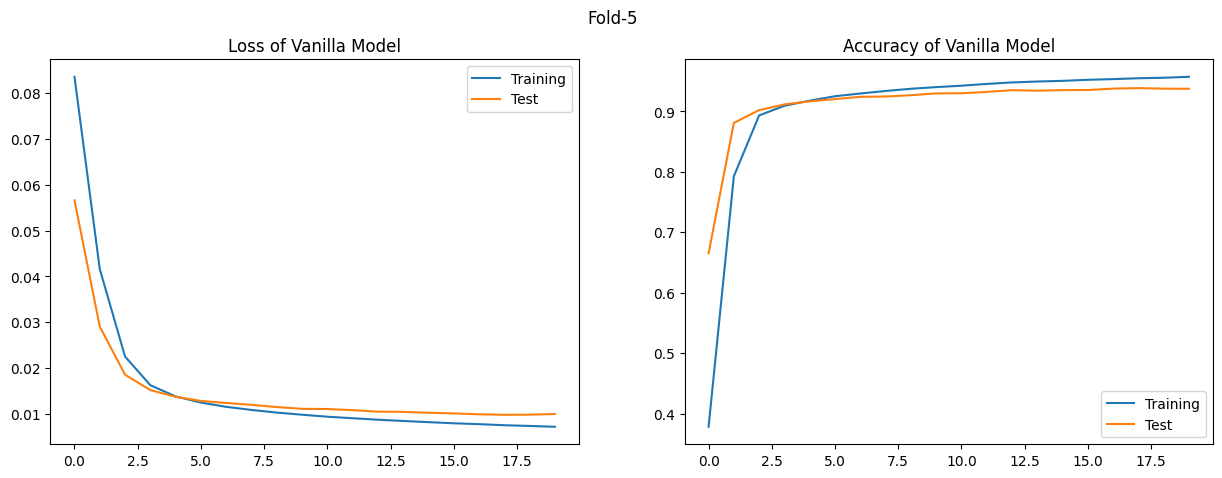

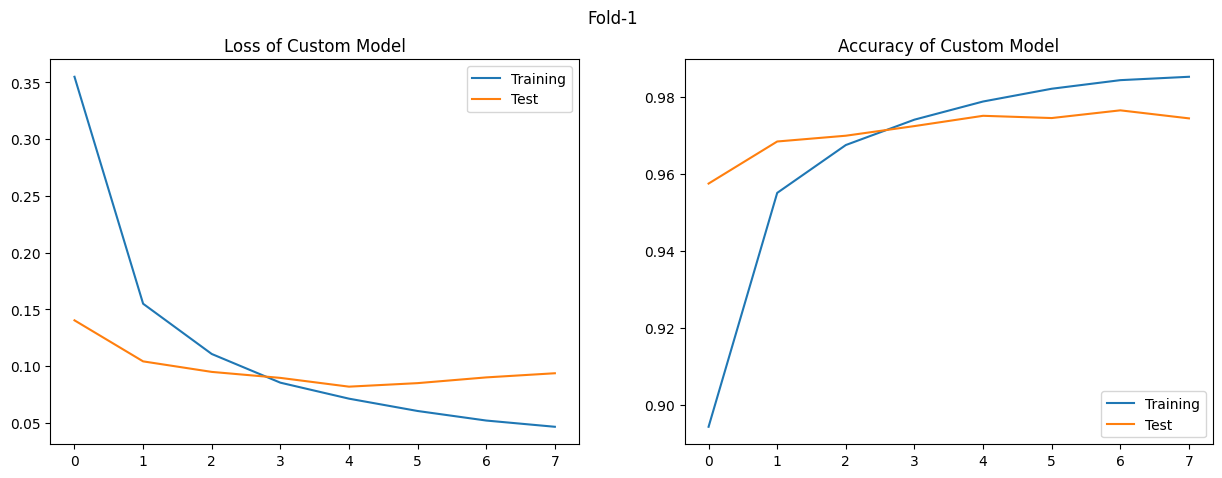

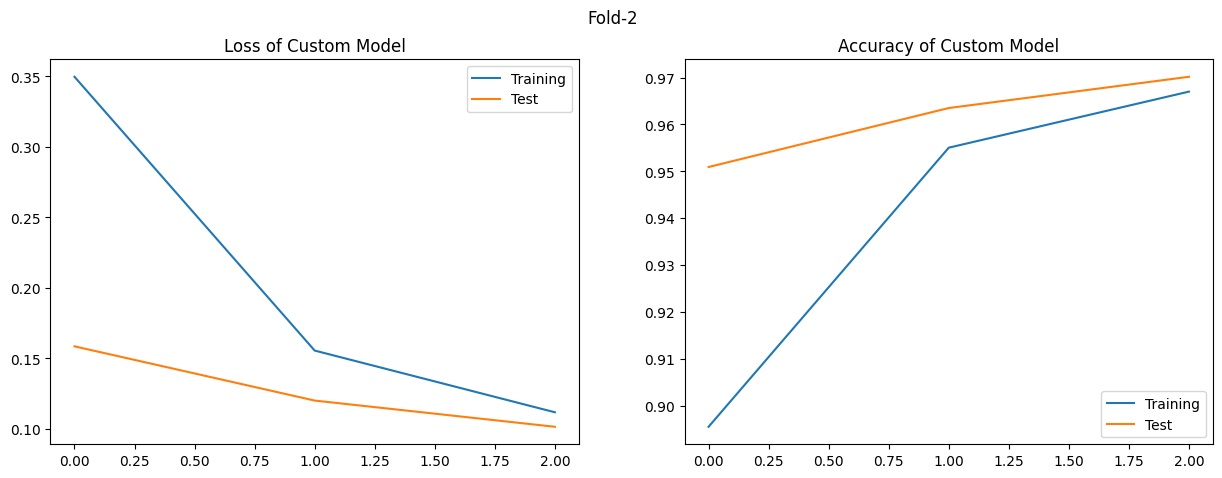

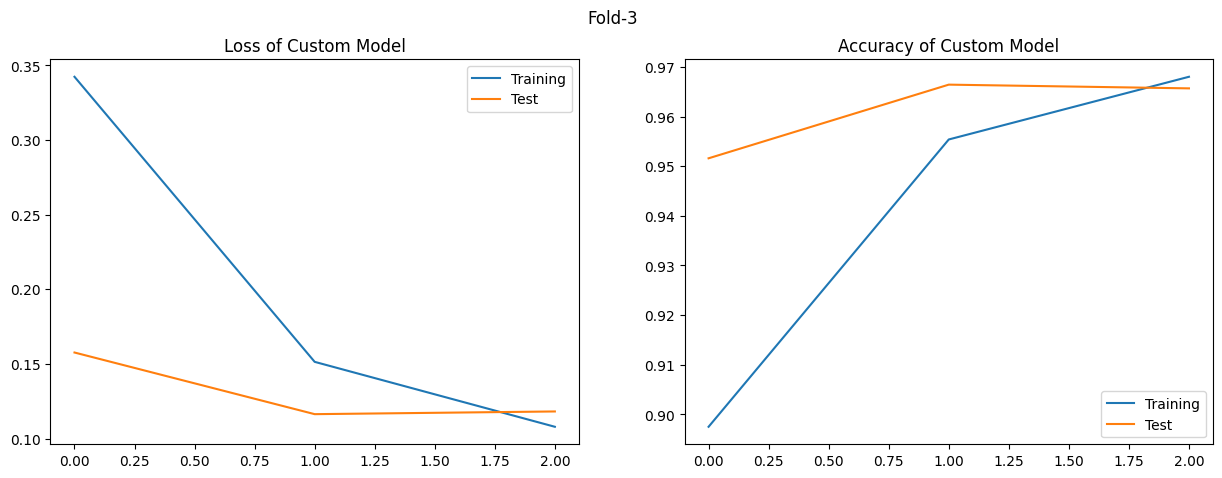

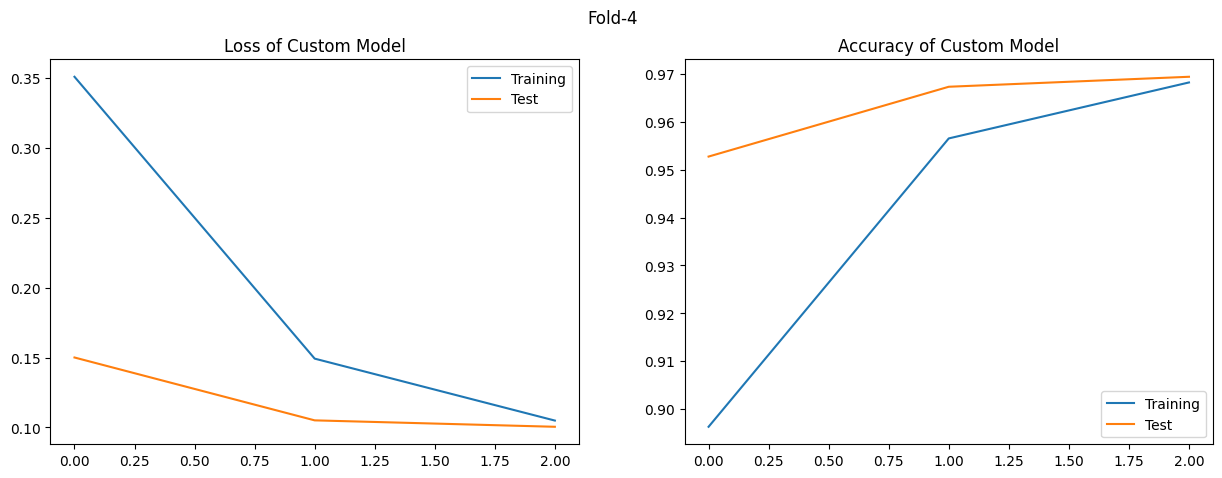

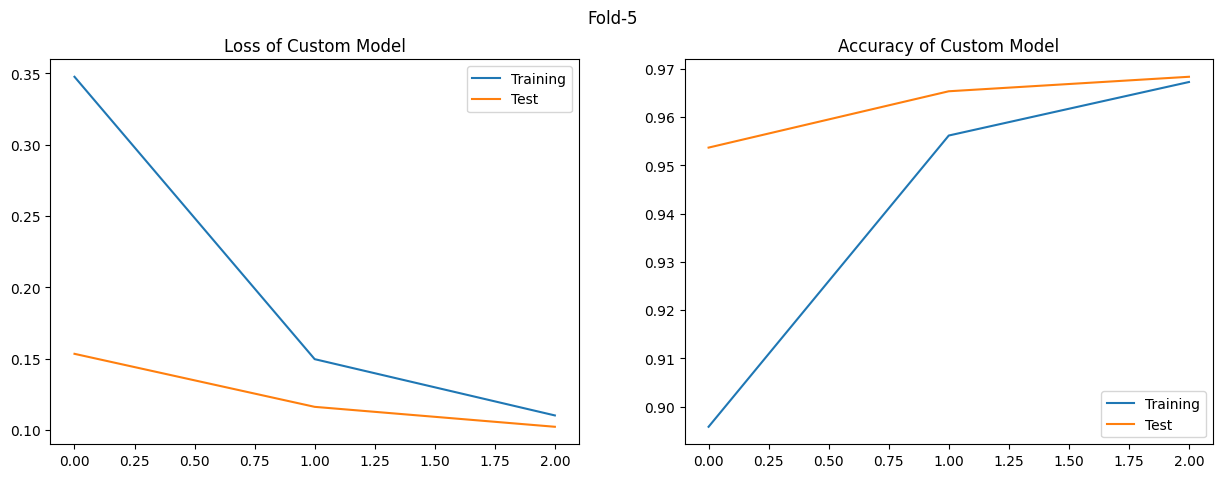

In [39]:
# Displaying the graph results for vanilla model
for history in histories_vanilla:
    display_kfold_result(history, (histories_vanilla.index(history)+1), "Vanilla Model")

# Displaying the graph results for custom model
for history in histories_custom:
    display_kfold_result(history, (histories_custom.index(history)+1), "Custom Model")

In [40]:
vanilla_model.save("vanilla_model.keras")
custom_model.save("custom_model.keras")

To reload the model:

In [ ]:
model = keras.saving.load_model("custom_model.keras")

Query predictions of class probabilities with `predict()`:

In [ ]:
predictions = custom_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## Discussion:

- The custom model reaches higher validation data accuracy much sooner (within fewer epochs)than the vanilla model and then starts optimizing the performance.
- However after training the vanilla model longer they reach similar accuracies.
- Custom Model has a much lower training time because:
1. Sparse Categorical Crossentropy is a better cost function than the mean squared error, especially for multi class classification (higher accuracy)
2. a smaller batch is sufficient for the same accuracy
3. Early Stopping shortens the training time / needed epochs
4. The training of the first fold initially takes longer, however the folds after are very fastly organized

Added to that: The custom model was very prone to overfitting until the dropout method was used (test data accuracy started to be lower than tarining accuracy at the end)

- For the mean squared error one hot encoding is needed in order to compare each input with the 10 class labels up for comparison, Sparse Categorical Cross Entropy utilizes one hot encoding automnatically, which makes the programming for multiclass problems more convenient

- The vanilla model, with a very simple network and only 16 neurons, already reaches high accuracy of around 94.5% but takes longer than the custom model to reach that accuracy and is a bit capped with that value that range.
- the custom model reaches a higher accuracy of around 97% (up to 3% more than the vanilla model) much faster but requires therefore more neurons and biases to be trained (almost 7 x more trainable parameters)
-> for this small dataset this is not a problem. However, would this be a much larger dataset, then this would show itself as a greater inefficieny in regards to the training in the first fold.


